In [145]:
import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
import statsmodels
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [146]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [147]:
train_org = train.copy()
test_org = test.copy()

In [148]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [149]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [150]:
test.shape, train.shape

((5112, 2), (18288, 3))

In [151]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [152]:
train['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')
test_org['Datetime'] = pd.to_datetime(test_org.Datetime,format='%d-%m-%Y %H:%M')
train_org['Datetime'] = pd.to_datetime(train_org.Datetime,format='%d-%m-%Y %H:%M')

In [153]:
train.dtypes

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

In [154]:
train.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [155]:
for i in (test, train, test_org, train_org):
    i['Year'] = i.Datetime.dt.year
    i['Month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour
    #i["day of the week"] = i.Datetime.dt.dayofweek

In [156]:
test.head()

,ID,Datetime,Year,Month,day,Hour
0,18288,2014-09-26 00:00:00,2014,9,26,0
1,18289,2014-09-26 01:00:00,2014,9,26,1
2,18290,2014-09-26 02:00:00,2014,9,26,2
3,18291,2014-09-26 03:00:00,2014,9,26,3
4,18292,2014-09-26 04:00:00,2014,9,26,4


In [157]:
train['day of the week'] = train.Datetime.dt.dayofweek

In [158]:
train.head()

,ID,Datetime,Count,Year,Month,day,Hour,day of the week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [159]:
temp = train['Datetime']

In [160]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
    
temp2 = train.Datetime.apply(applyer)
train['weekend'] = temp2

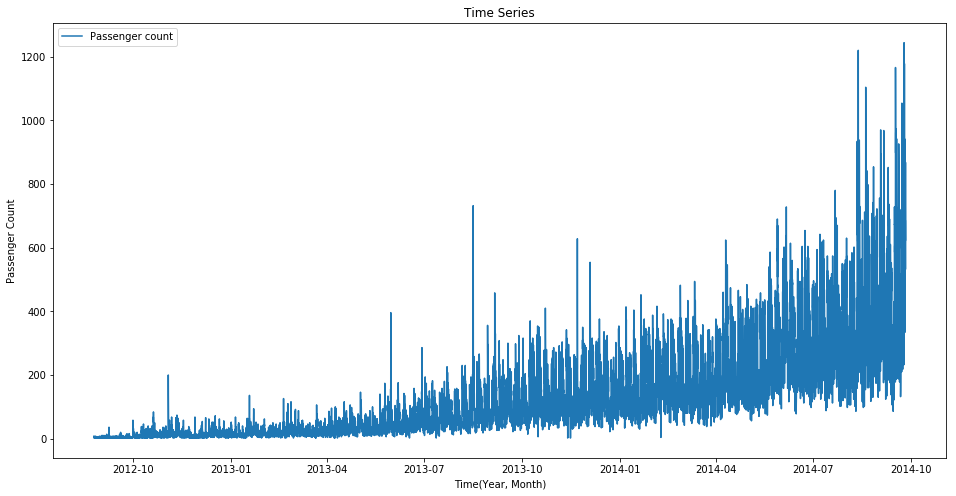

In [161]:
train.index = train['Datetime']
df = train.drop('ID',1)
ts = df['Count']
plt.figure(figsize = (16,8))
plt.plot(ts, label = 'Passenger count')
plt.title('Time Series')
plt.xlabel('Time(Year, Month)')
plt.ylabel("Passenger Count")
plt.legend(loc = 'best')

# Exploratory Data Analysis

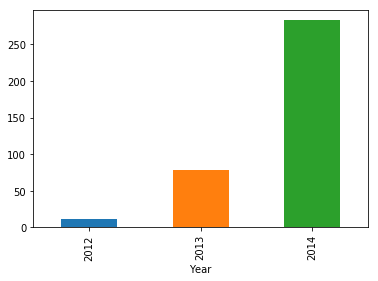

In [162]:
train.groupby('Year')['Count'].mean().plot.bar()

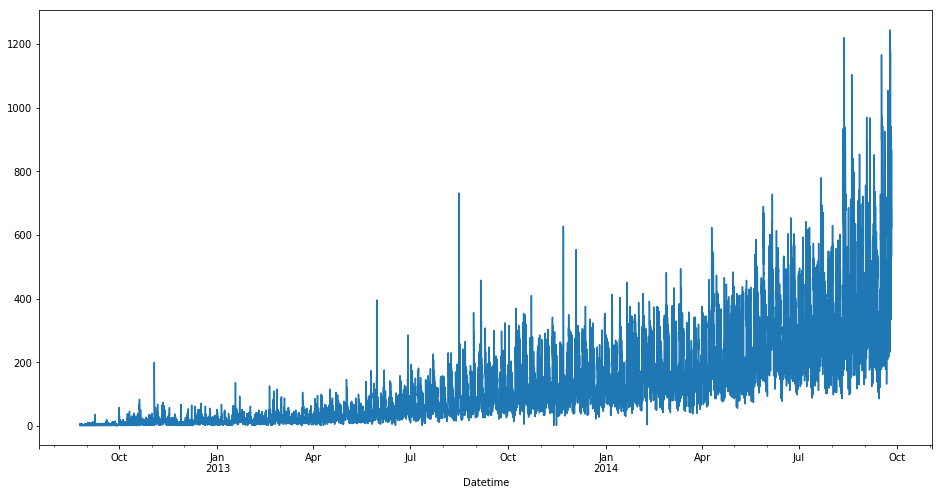

In [163]:
plt.figure(figsize = (16,8))
train['Count'].plot()

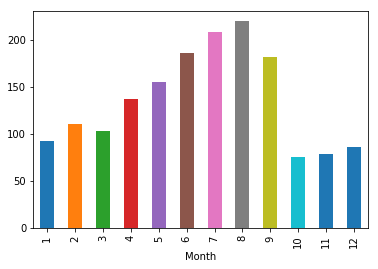

In [164]:
train.groupby('Month')['Count'].mean().plot.bar()

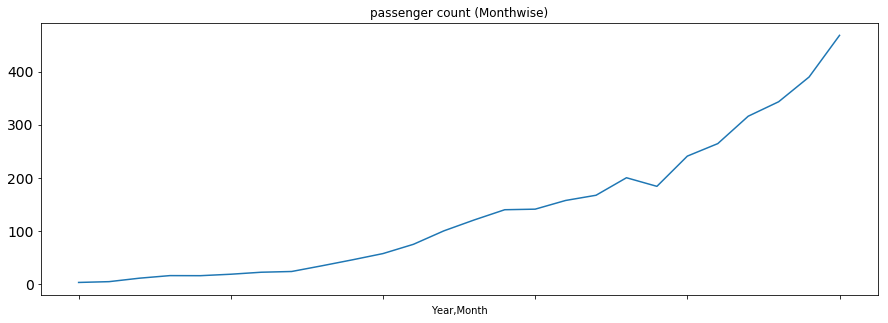

In [165]:
temp = train.groupby(['Year','Month'])['Count'].mean()
temp.plot(figsize = (15,5), title = 'passenger count (Monthwise)', fontsize = 14)

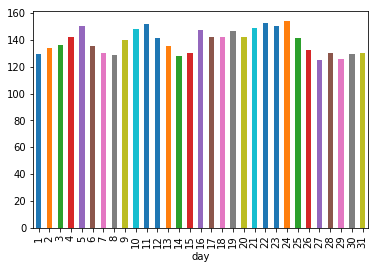

In [166]:
train.groupby('day')['Count'].mean().plot.bar()

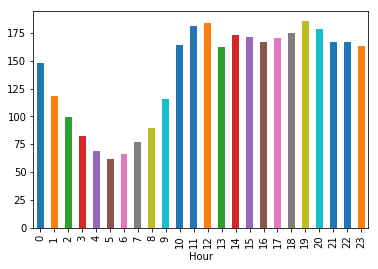

In [167]:
train.groupby('Hour')['Count'].mean().plot.bar()

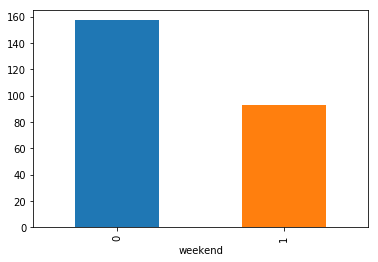

In [168]:
train.groupby('weekend')['Count'].mean().plot.bar()

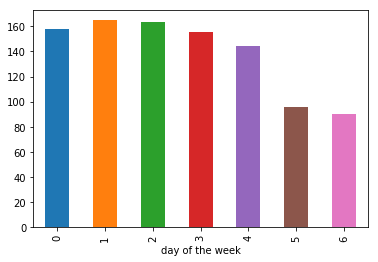

In [169]:
train.groupby('day of the week')['Count'].mean().plot.bar()

In [170]:
train.head()

,ID,Datetime,Count,Year,Month,day,Hour,day of the week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [171]:
train = train.drop('ID', 1)

In [172]:
train.timestamp = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
train.index = train.timestamp

#hourly time series
hourly = train.resample('H').mean()

#converting to daily mean
daily = train.resample('D').mean()

#converting to weekly mean
weekly = train.resample('W').mean()

#converting to monthly mean
monthly = train.resample('M').mean()

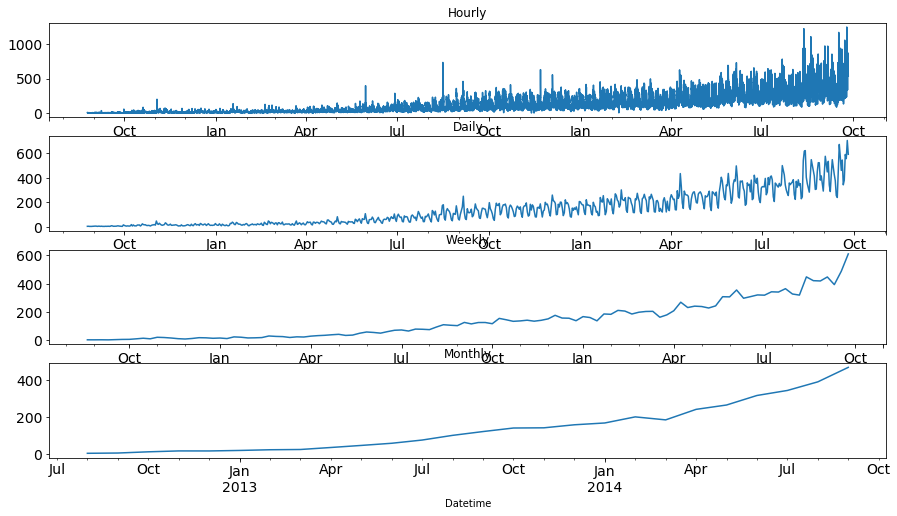

In [173]:
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize = (15,8), title = 'Hourly', fontsize = 14, ax = axs[0])
daily.Count.plot(figsize = (15,8), title = 'Daily', fontsize = 14, ax = axs[1])
weekly.Count.plot(figsize = (15,8), title = 'Weekly', fontsize = 14, ax = axs[2])
monthly.Count.plot(figsize = (15,8), title = 'Monthly', fontsize = 14, ax = axs[3])
plt.show()

In [174]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 

# Converting to daily mean
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Converting to daily mean
train = train.resample('D').mean()

In [175]:
# Splitting train and validation data
Train = train.ix['2012-08-25':'2014-06-24']
valid = train['2014-06-25':'2014-09-25']

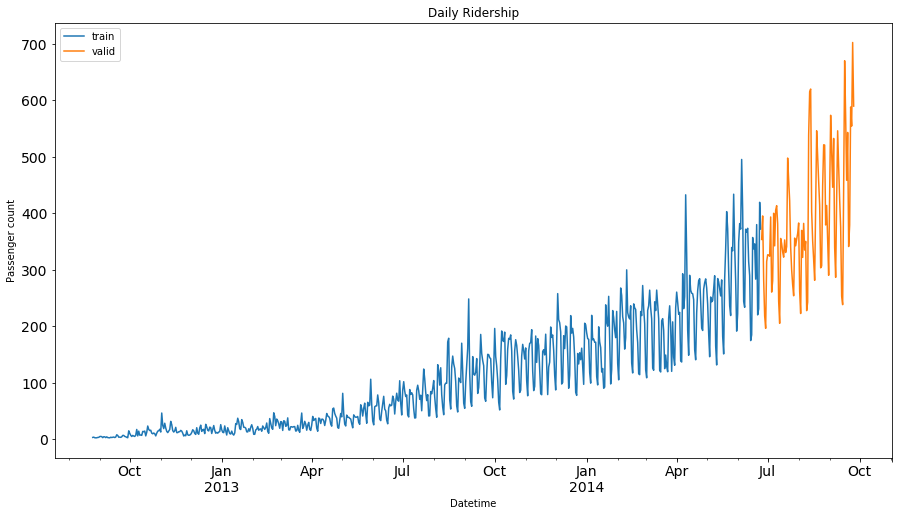

In [176]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

In [177]:
#modeling

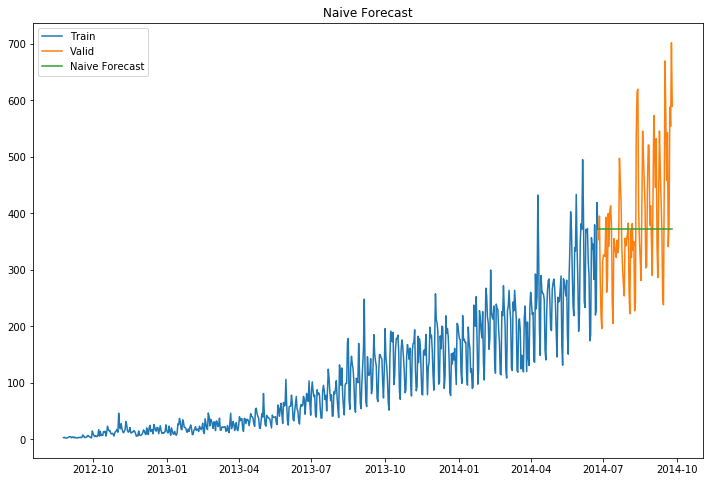

In [178]:
#naive approach
dd = np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize = (12,8))
plt.plot(Train.index, Train['Count'], label = 'Train')
plt.plot(valid.index,valid['Count'], label='Valid')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [179]:
#checking the accruacy with RMSE for Naive Approach
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive))
print(rms)

111.79050467496724


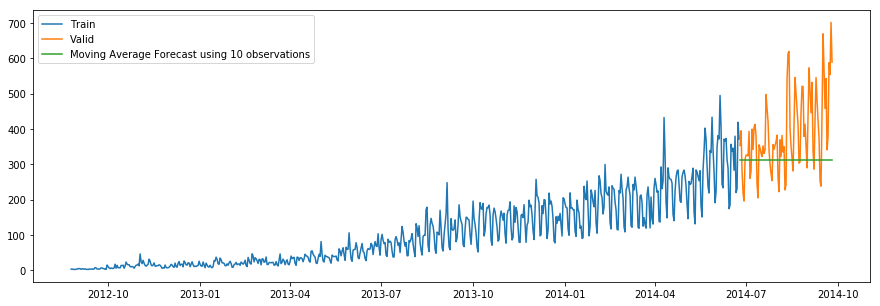

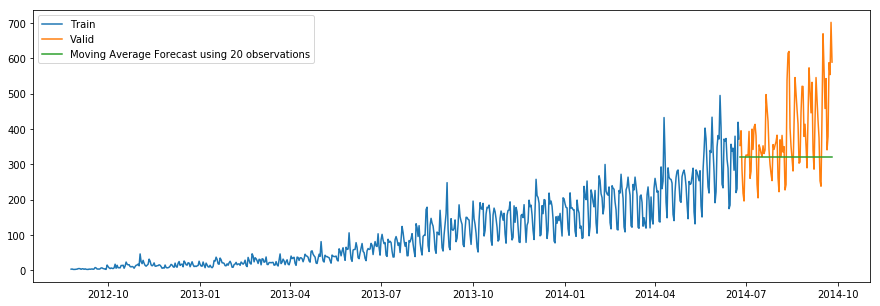

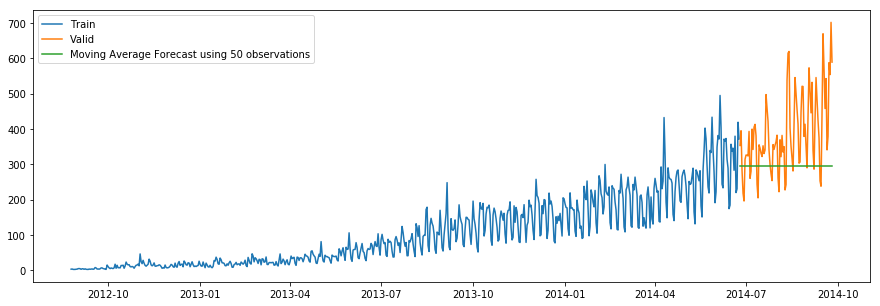

In [180]:
# Moving Average
# Moving average of last 10 observations
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()

#Moving average of last 20 observations
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.show()

#Moving average of last 50 observations
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.show()

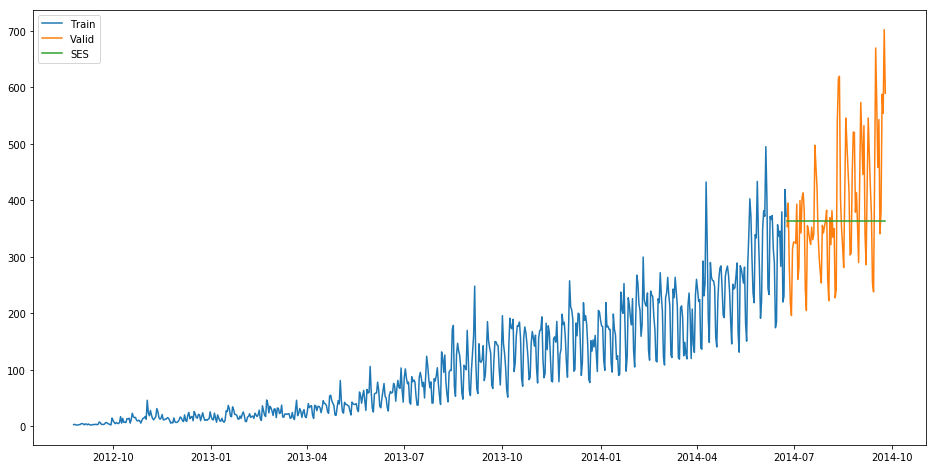

In [181]:
#Simple Exponential Smoothing 
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level = 0.6, optimized = False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize = (16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [182]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES))
print(rms)

113.43708111884514


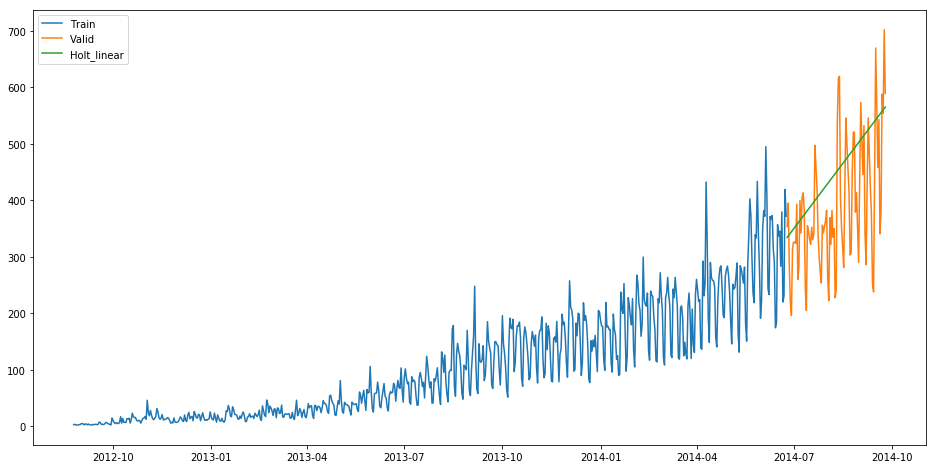

In [183]:
# Holts Linear Trend Model
y_hat_avg = valid.copy()

fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3, smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [184]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear))
print(rms)

112.94278345314041


In [185]:
#Since holts linear trend has the best accuracy, lets use that to predict on test dataset
submission = pd.read_csv('Predictions.csv')
predict = fit1.forecast(len(test))
test['prediction'] = predict

In [186]:
# calculating the hourly ratio of count
train_org['ratio'] = train_org['Count']/train_org['Count'].sum()

In [187]:
#grouping by hourly count
temp = train_org.groupby(['Hour'])['ratio'].sum()

In [188]:
#Groupby to csv format
pd.DataFrame(temp, columns =['ratio']).to_csv('GROUPBY.csv')

In [189]:
temp2 = pd.read_csv('GROUPBY.csv')

In [190]:
#merge test and test_org on day, month and year
merge = pd.merge(test,test_org, on= ('day','Month','Year'),how = 'left')

In [191]:
merge['Hour'] = merge['Hour_y']
merge['ID'] = merge['ID_y']

In [192]:
merge.head()

,ID_x,Year,Month,day,Hour_x,prediction,ID_y,Datetime,Hour_y,Hour,ID
0,18299.5,2014,9,26,11.5,334.650767,18288,2014-09-26 00:00:00,0,0,18288
1,18299.5,2014,9,26,11.5,334.650767,18289,2014-09-26 01:00:00,1,1,18289
2,18299.5,2014,9,26,11.5,334.650767,18290,2014-09-26 02:00:00,2,2,18290
3,18299.5,2014,9,26,11.5,334.650767,18291,2014-09-26 03:00:00,3,3,18291
4,18299.5,2014,9,26,11.5,334.650767,18292,2014-09-26 04:00:00,4,4,18292


In [193]:
merge = merge.drop(['Year','Month','Datetime','Hour_x','Hour_y','ID_x','ID_y'], axis =1)

In [194]:
merge.head()

,day,prediction,Hour,ID
0,26,334.650767,0,18288
1,26,334.650767,1,18289
2,26,334.650767,2,18290
3,26,334.650767,3,18291
4,26,334.650767,4,18292


In [195]:
#predicting by merging merge and temp2
prediction = pd.merge(merge,temp2, on = 'Hour', how = 'left')

In [196]:
prediction['Count'] = prediction['prediction']*prediction['ratio']*24

In [197]:
submission = prediction

In [198]:
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt_Linear.csv')

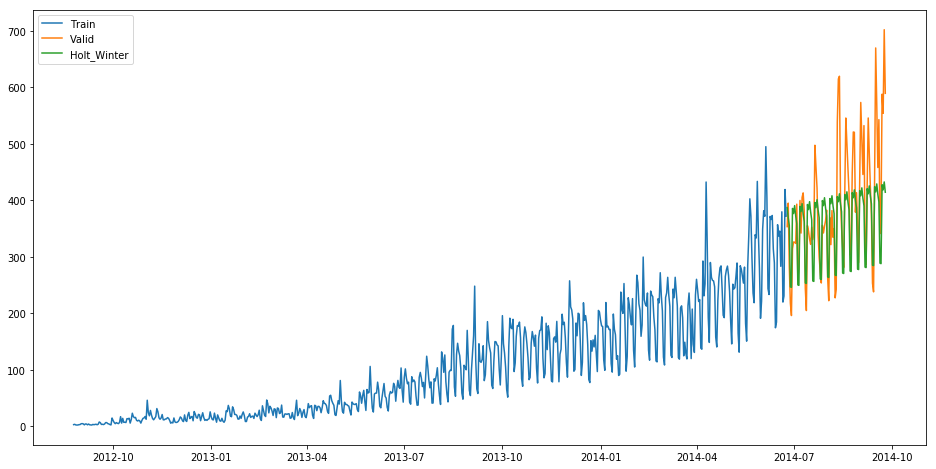

In [199]:
# Holts Winter model
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Count']), seasonal_periods = 7, trend = 'add', seasonal = 'add',).fit()
y_hat_avg['Holts_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot( Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holts_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [200]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holts_Winter))
print(rms)

82.37292653831038


In [201]:
predict=fit1.forecast(len(test))

In [202]:
test['prediction']=predict

In [203]:
# Merge Test and test_original on day, month and year
merge=pd.merge(test, test_org, on=('day','Month', 'Year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['Year', 'Month', 'Datetime','Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [204]:
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt winters.csv')

In [205]:
#function to do dickey fuller test to determine if the data is stationary timeseries
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    #determine rolling stats
    rolmean = pd.rolling_mean(timeseries, window = 24)
    rolstd = pd.rolling_std(timeseries,window=24)
    
    #plot rolling stats:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #performing dickey fuller test:
    print('Results of Dickey-Fuller Test: ')
    dftest = adfuller(timeseries,autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'P-value', '#lags used', 'No of Observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

In [206]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10


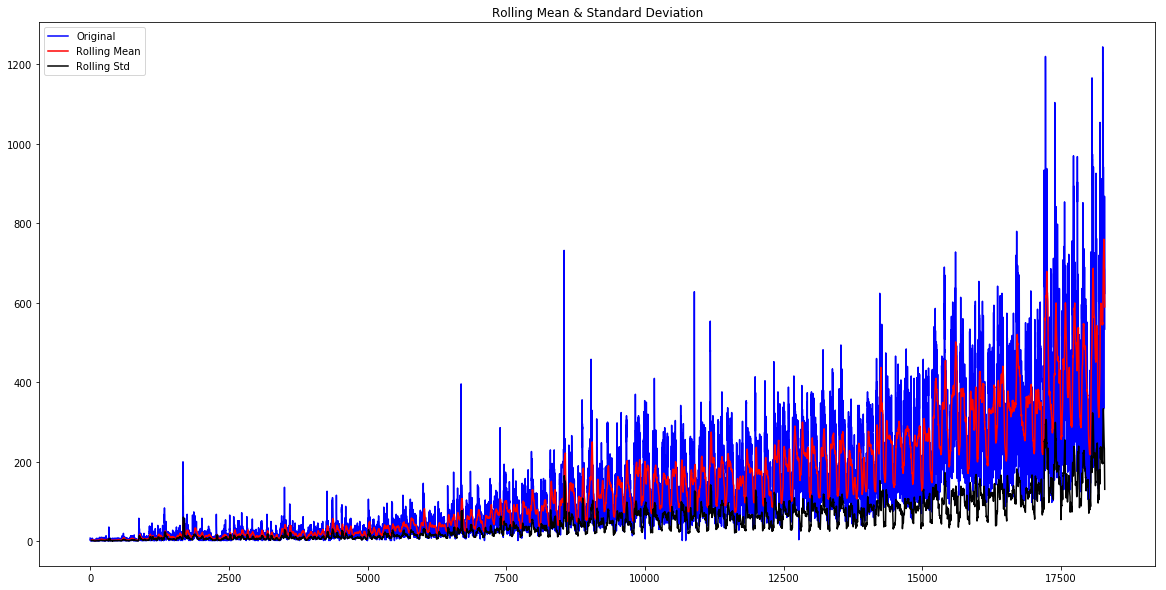

Results of Dickey-Fuller Test: 
Test Statistic                -4.456561
P-value                        0.000235
#lags used                    45.000000
No of Observations used    18242.000000
Critical Value (1%)           -3.430709
Critical Value (5%)           -2.861698
Critical Value (10%)          -2.566854
dtype: float64


In [207]:
test_stationary(train_org['Count'])

The test stats show that the data is stationary since the p-value is less than 0.05

In [208]:
Train_log = np.log(Train['Count'])
valid_log = np.log(Train['Count'])

In [209]:
Train_log.head()

Datetime
2012-08-25    1.152680
2012-08-26    1.299283
2012-08-27    0.949081
2012-08-28    0.882389
2012-08-29    0.916291
Freq: D, Name: Count, dtype: float64

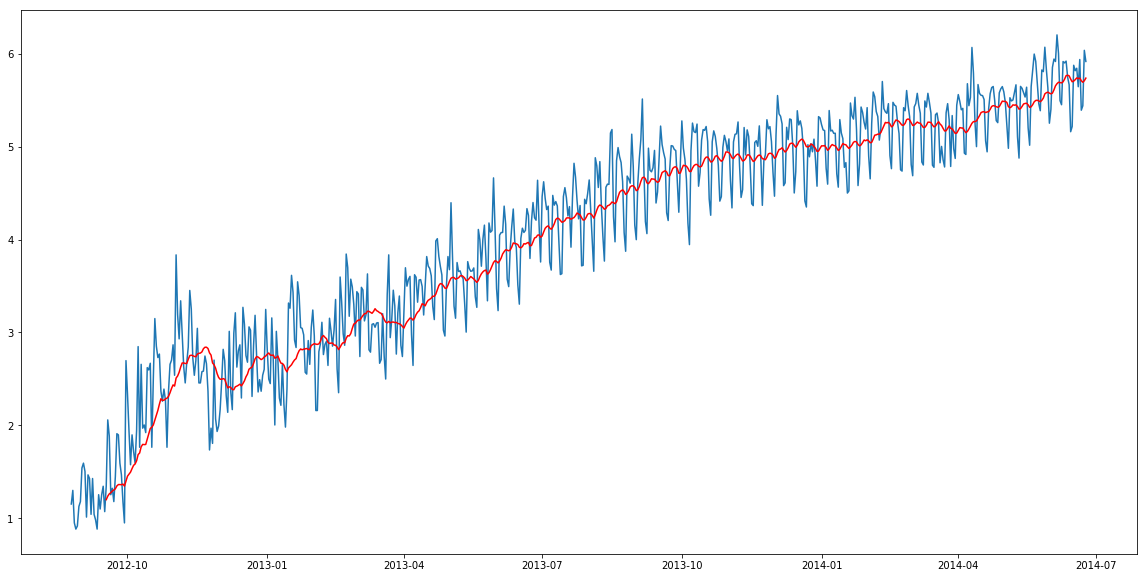

In [210]:
moving_avg = pd.rolling_mean(Train_log, 24)
plt.plot(Train_log)
plt.plot(moving_avg, color = 'red')
plt.show()

In [211]:
train_log_moving_avg_diff = Train_log - moving_avg

In [212]:
train_log_moving_avg_diff.dropna(inplace = True)

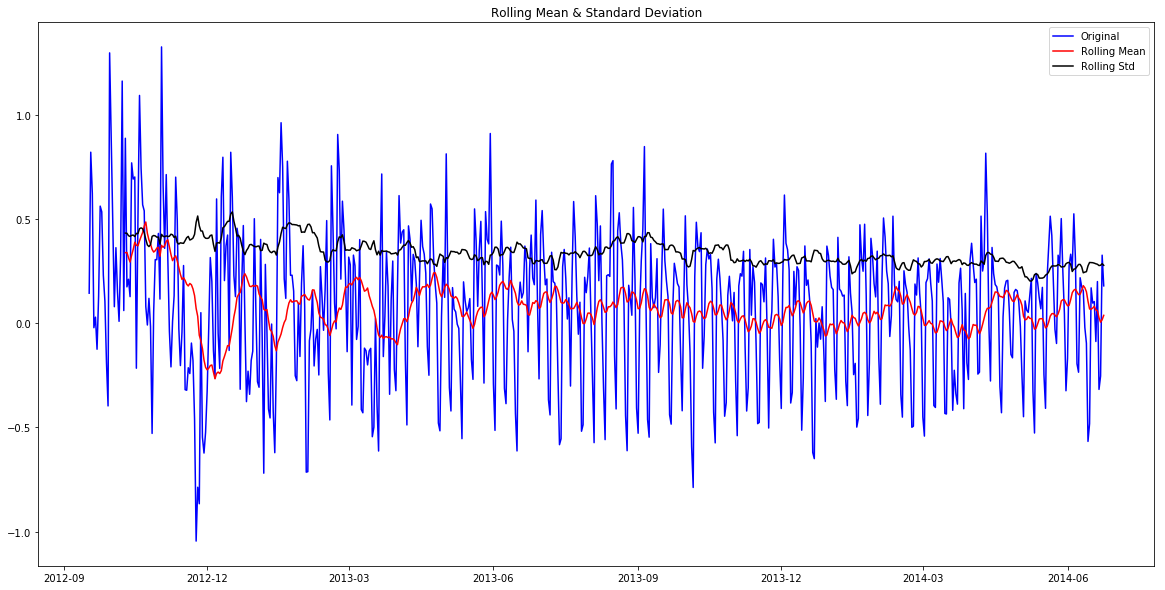

Results of Dickey-Fuller Test: 
Test Statistic            -5.861646e+00
P-value                    3.399422e-07
#lags used                 2.000000e+01
No of Observations used    6.250000e+02
Critical Value (1%)       -3.440856e+00
Critical Value (5%)       -2.866175e+00
Critical Value (10%)      -2.569239e+00
dtype: float64


In [213]:
test_stationary(train_log_moving_avg_diff)

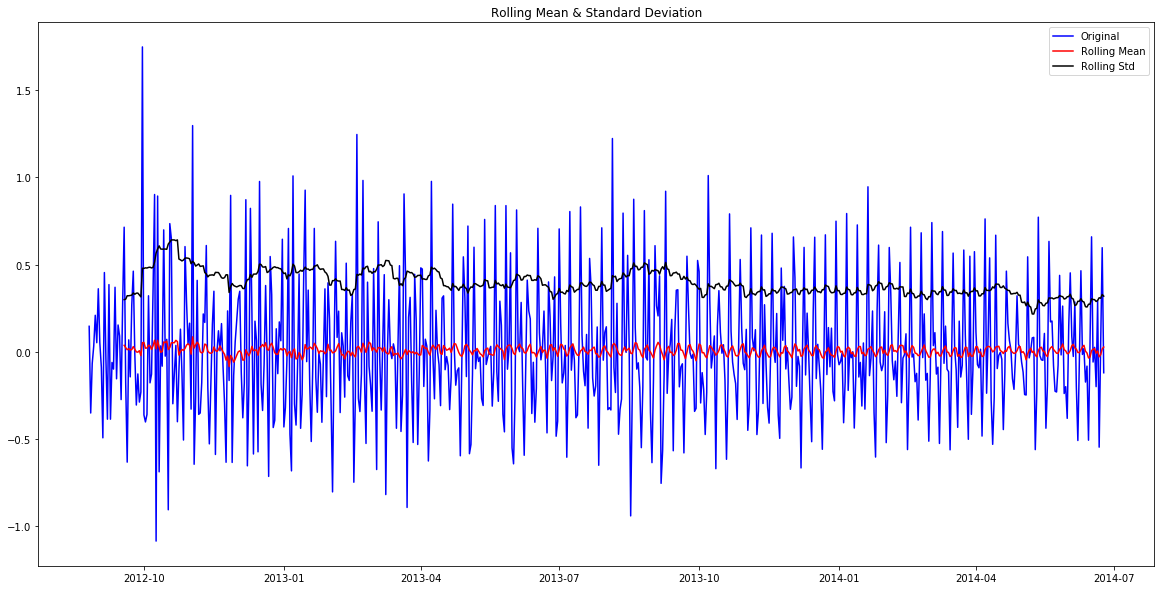

Results of Dickey-Fuller Test: 
Test Statistic            -8.237568e+00
P-value                    5.834049e-13
#lags used                 1.900000e+01
No of Observations used    6.480000e+02
Critical Value (1%)       -3.440482e+00
Critical Value (5%)       -2.866011e+00
Critical Value (10%)      -2.569151e+00
dtype: float64


In [214]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationary(train_log_diff.dropna())

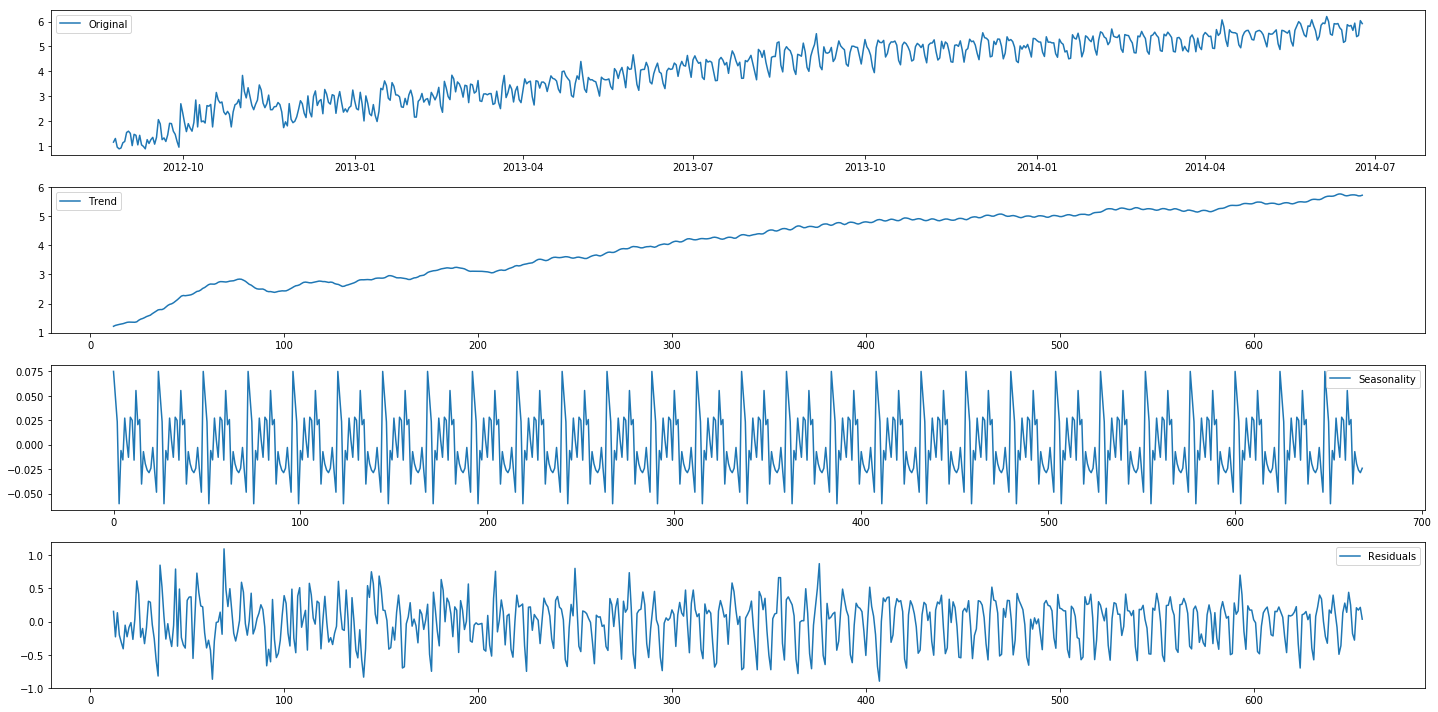

In [215]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

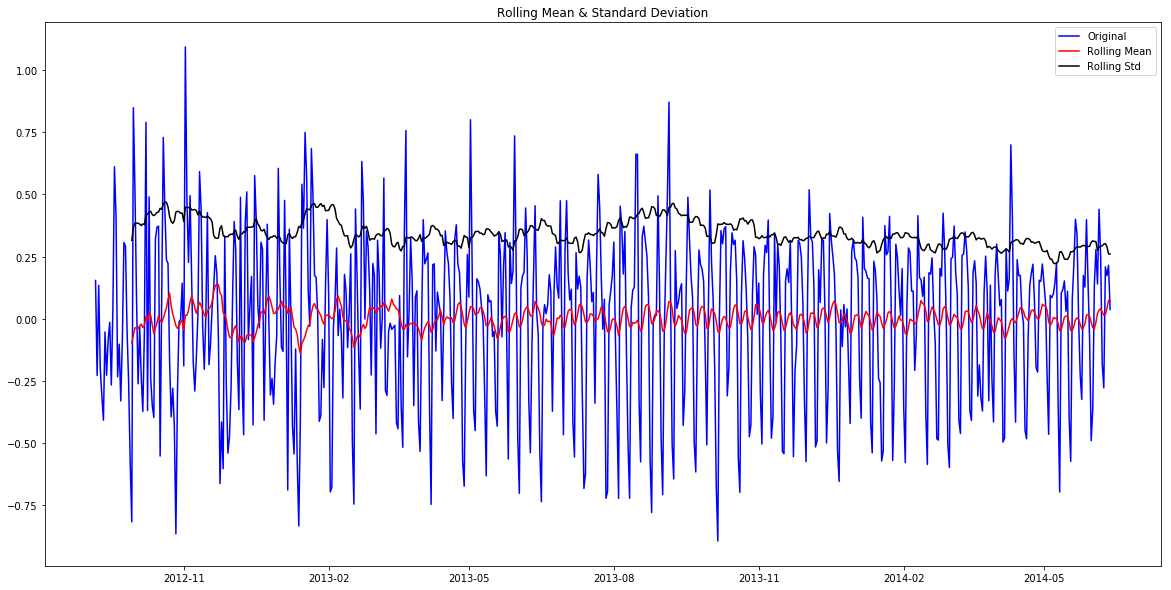

Results of Dickey-Fuller Test: 
Test Statistic            -7.822096e+00
P-value                    6.628321e-12
#lags used                 2.000000e+01
No of Observations used    6.240000e+02
Critical Value (1%)       -3.440873e+00
Critical Value (5%)       -2.866183e+00
Critical Value (10%)      -2.569243e+00
dtype: float64


In [216]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace=True)
train_log_decompose.dropna(inplace = True)
test_stationary(train_log_decompose[0])

In [217]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

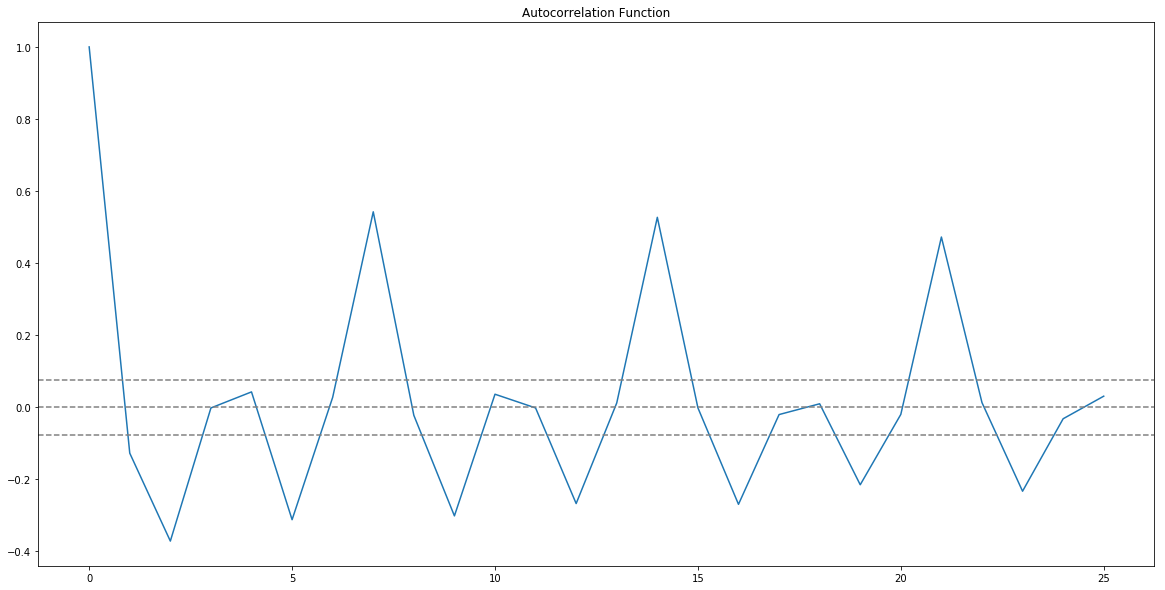

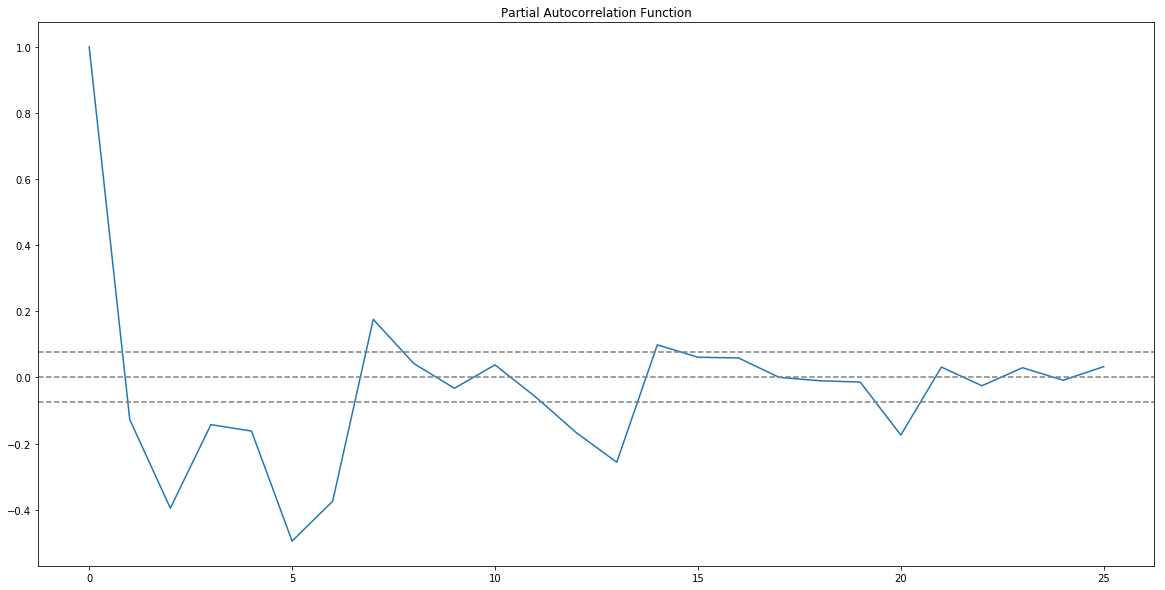

In [218]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

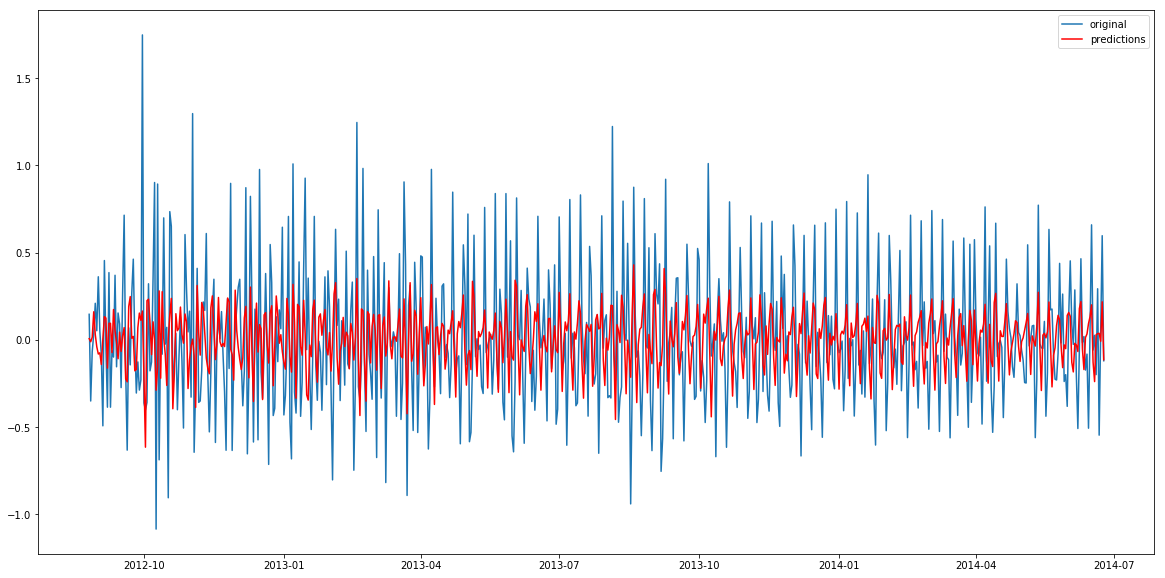

In [134]:
#AR MODEL
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Train_log, order = (2,1,0)) #here the q value is zero since it is just the AR model
results_AR = model.fit(disp = -1)
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_AR.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show()

In [135]:
AR_predict=results_AR.predict(start="2014-06-25", end="2014-09-25")
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

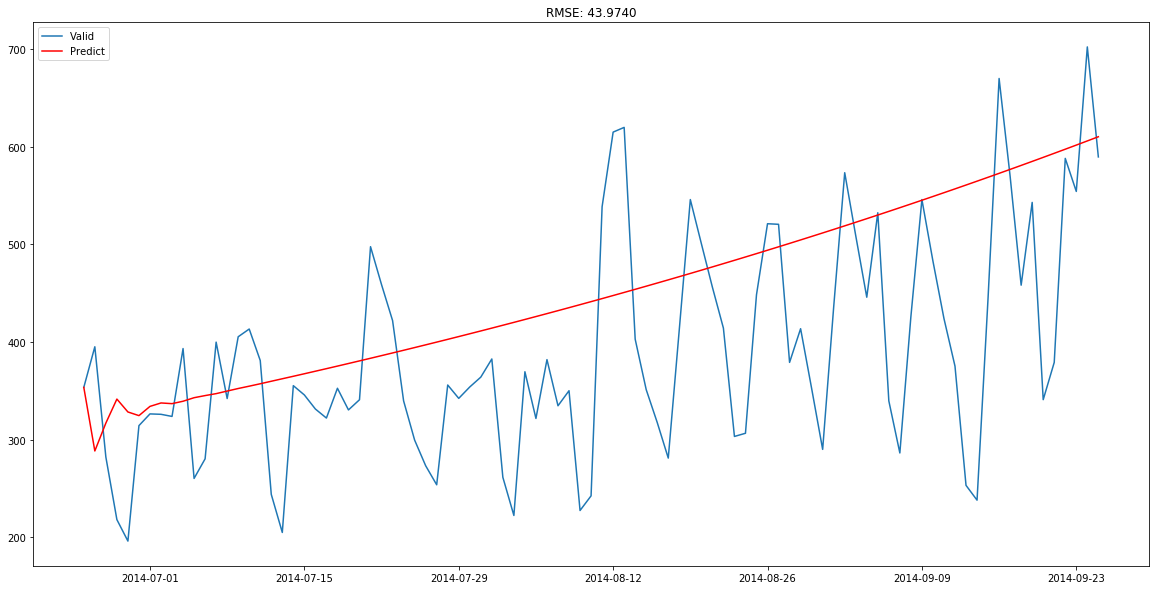

In [136]:
plt.plot(valid['Count'], label = "Valid")
plt.plot(AR_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0]))
plt.show()

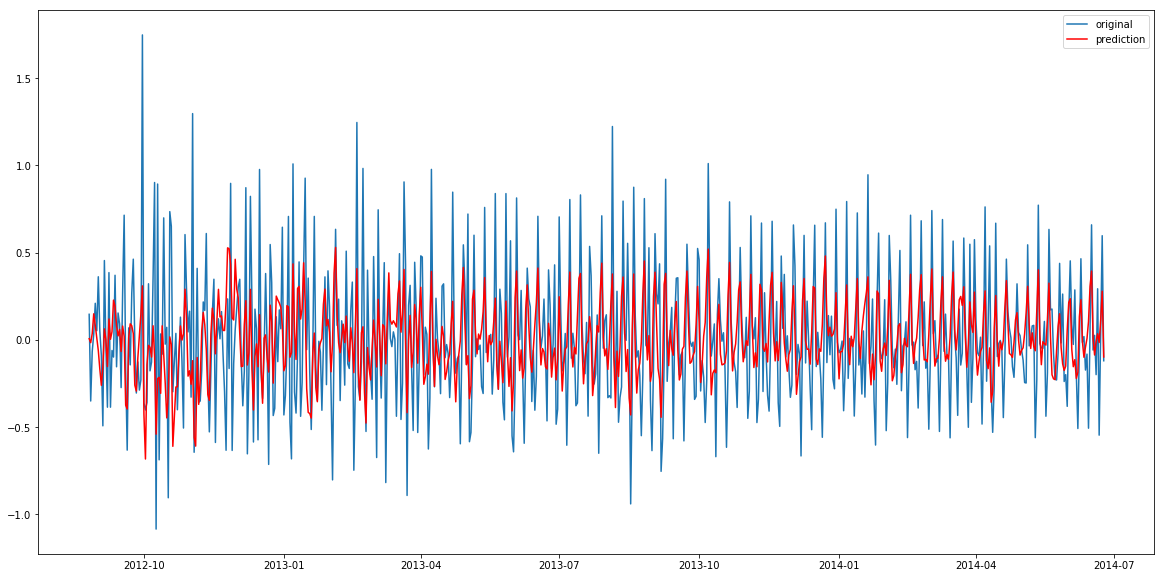

In [137]:
#MA Model
model = ARIMA(Train_log, order=(0, 1, 2))  # here the p value is zero since it is just the MA model
results_MA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_MA.fittedvalues, color='red', label='prediction')
plt.legend(loc='best')
plt.show()

In [138]:
MA_predict=results_MA.predict(start="2014-06-25", end="2014-09-25")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

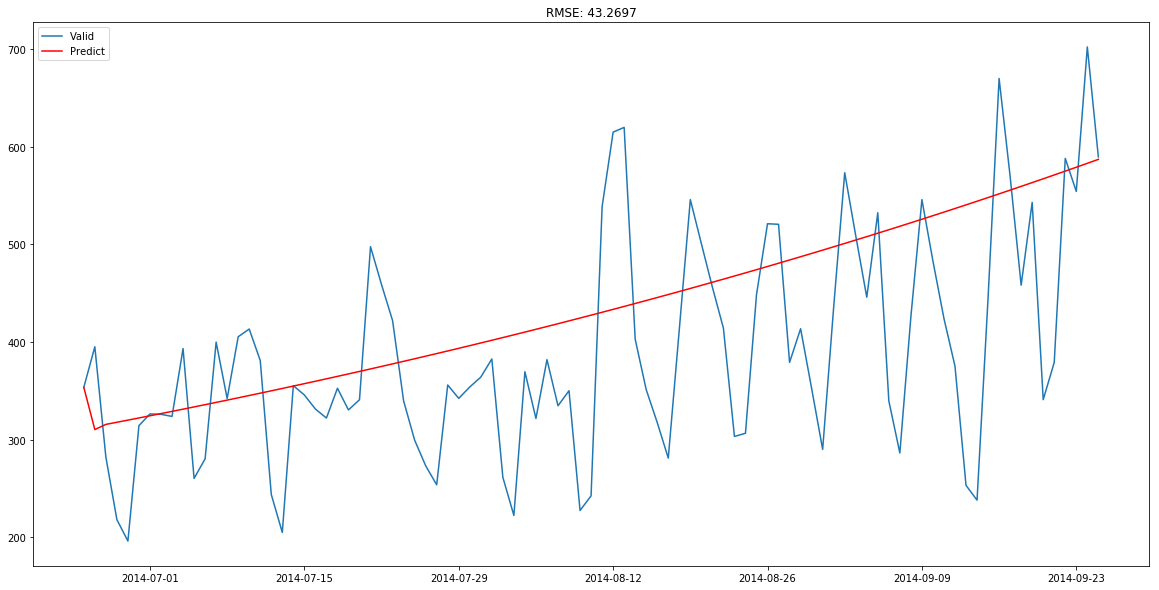

In [139]:
plt.plot(valid['Count'], label = "Valid")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0]))
plt.show()

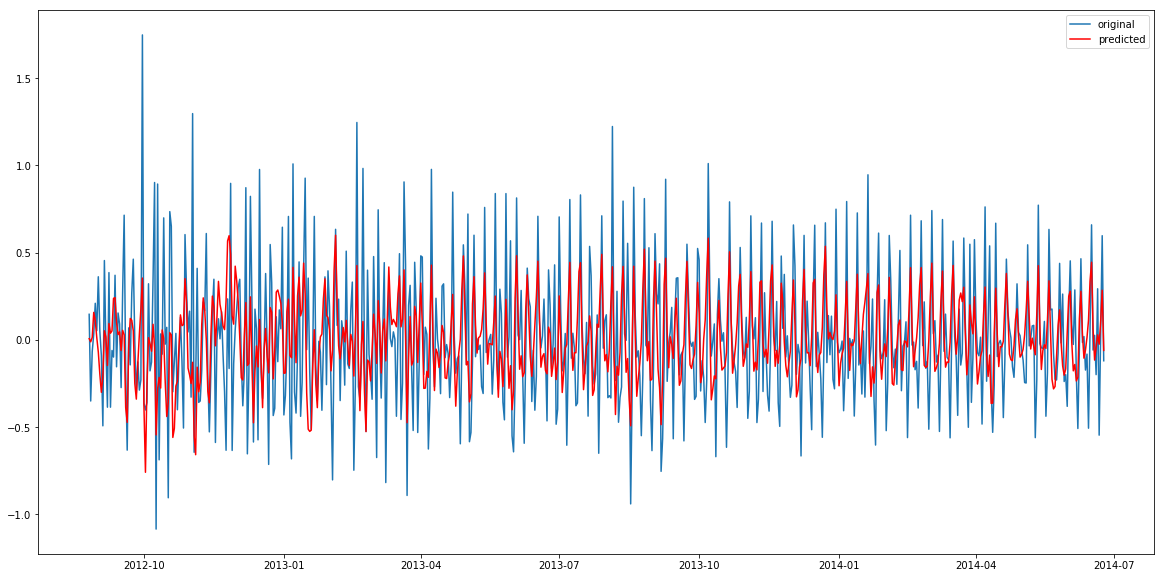

In [140]:
#ARMA Model
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted')
plt.legend(loc='best')
plt.show()

In [141]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [142]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [143]:
ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")

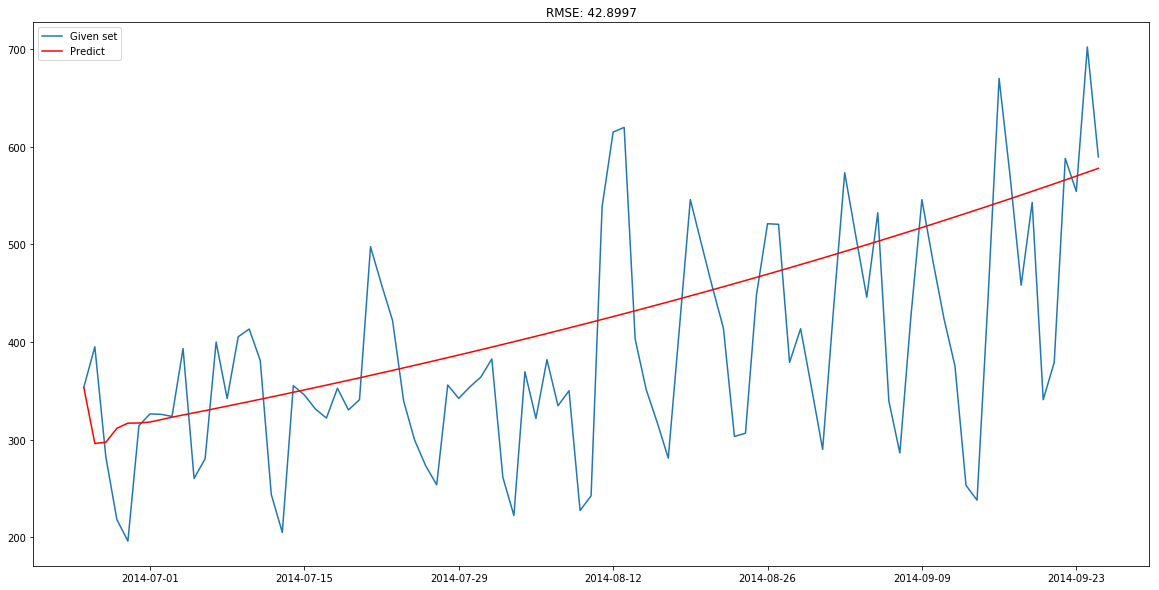

In [144]:
check_prediction_diff(ARIMA_predict_diff, valid)


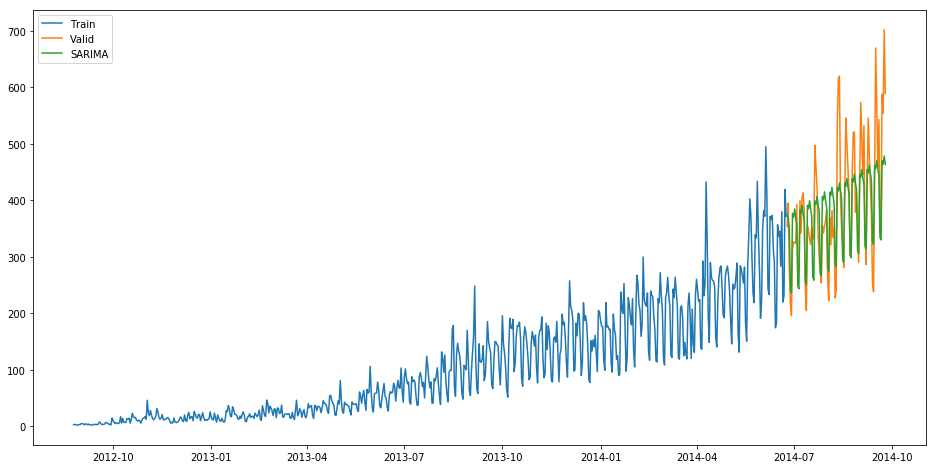

In [224]:
#SARIMAX Model
import statsmodels.api as sm
y_hat_avg = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [225]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA))
print(rms)

70.26240839723575


In [226]:
predict=fit1.predict(start="2014-9-26", end="2015-4-26", dynamic=True)

In [227]:
test['prediction']=predict

In [230]:
# Merge Test and test_original on day, month and year
merge=pd.merge(test, test_org, on=('day','Month', 'Year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['Year', 'Month', 'Datetime','Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [231]:
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('SARIMAX.csv')
